In [18]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data1 = pd.read_csv("Data_Marketing_Customer_Analysis_Round2.csv", index_col=0)

In [3]:
data1

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [4]:
##Which columns are numerical?
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_data1 = data1.select_dtypes(include=numerics)



In [5]:
numeric_data1

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [6]:
##Which columns are categorical?
data1.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Vehicle Type'],
      dtype='object')

In [7]:
## Categorical columns : "State" "Response" "Coverage" "Education" "EmploymentStatus" "Gender" "Location Code" 
##"Marital Status" "Policy Type" "Policy" "Renew Offer Type" "Sales Channel" "Vehicle Class" "Vehicle Size" 
##"Vehicle Type"

In [8]:
##Datetime format - Extract the months from the dataset and store in a separate column. 
##Then filter the data to show only the information for the first quarter , ie. January, February and March. 
##Hint: If data from March does not exist, consider only January and February.


In [9]:
data1[["Effective To Date"]]

,Effective To Date
0,2/18/11
1,1/18/11
2,2/10/11
3,1/11/11
4,1/17/11
...,...
10905,1/19/11
10906,1/6/11
10907,2/6/11
10908,2/13/11


In [10]:
data1["new_column"] = data1["Effective To Date"]

In [11]:
##data1[["new_col_month", "new_col_dateofmonth", "new_col_year"]] = data1.new_column.str.split(pat="/", expand=True)
##data1.replace({"new_col_month" : {"1" : "January", "2" : "February", "3" : "March" }})


In [12]:
def extract_month(x):
    x = x.split("/")[0]
    if x == "1":
        return "January"
    elif x == "2":
        return "February"

data1["new_column"] = list(map(extract_month, data1["new_column"]))

In [13]:

first_q=["January", "February", "March"]

data_first_q = data1.loc[data1['new_column'].isin(first_q)] 

In [14]:
data_first_q

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type,new_column
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,February
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,January
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,February
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,January
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,January
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,January
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN,February
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,February


In [15]:
##Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. 
##(You can use np.number and np.object to select the numerical data types and categorical data types respectively)


In [16]:
numerical = data1.select_dtypes(include=np.number)
categoricals = data1.select_dtypes(include=np.object)


/var/folders/xw/scy5flt94d56tjrc4x62mjrc0000gn/T/ipykernel_24747/4010582519.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = data1.select_dtypes(include=np.object)


<AxesSubplot:xlabel='Total Claim Amount', ylabel='Density'>

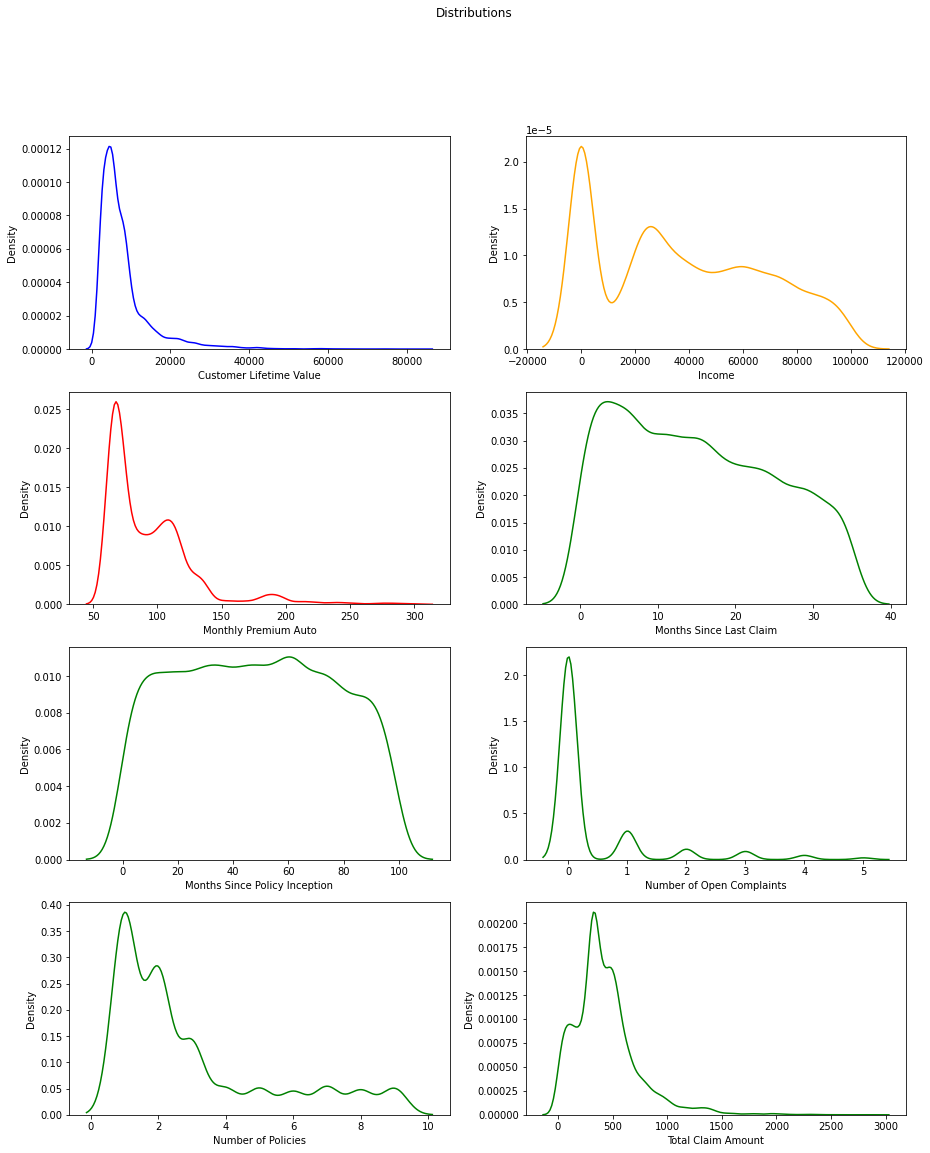

In [19]:
figdist, ax = plt.subplots(4,2, figsize = (15, 18))
plt.suptitle("Distributions")


sns.kdeplot(numerical['Customer Lifetime Value'], color= 'blue', ax=ax[0,0])

sns.kdeplot(numerical['Income'], color= 'orange', ax=ax[0,1])

sns.kdeplot(numerical['Monthly Premium Auto'],color= 'red', ax=ax[1,0])

sns.kdeplot(numerical['Months Since Last Claim'],  color= 'green', ax=ax[1,1])

sns.kdeplot(numerical['Months Since Policy Inception'],  color= 'green', ax=ax[2,0])

sns.kdeplot(numerical['Number of Open Complaints'],  color= 'green', ax=ax[2,1])

sns.kdeplot(numerical['Number of Policies'],  color= 'green', ax=ax[3,0])

sns.kdeplot(numerical['Total Claim Amount'],  color= 'green', ax=ax[3,1])

Text(0.5, 0, 'Customer Lifetime Value')

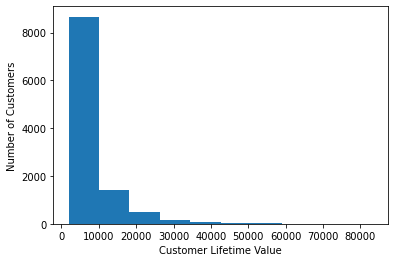

In [21]:
plt.hist(numerical['Customer Lifetime Value'], bins= 10) 
plt.ylabel('Number of Customers')
plt.xlabel('Customer Lifetime Value')

Text(0.5, 0, 'Income')

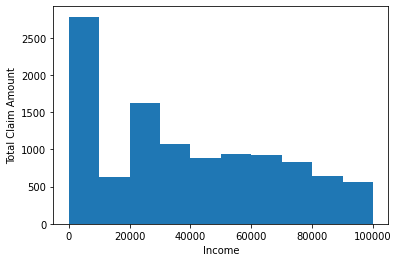

In [23]:
plt.hist(numerical['Income'], bins = 10)
plt.ylabel('Total Claim Amount')
plt.xlabel('Income')

In [24]:
numerical.corr()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.028306,0.403069,0.016052,0.016960,-0.032243,0.016024,0.232626
Income,0.028306,1.000000,-0.009788,-0.023814,-0.005903,0.007163,-0.009960,-0.354141
Monthly Premium Auto,0.403069,-0.009788,1.000000,0.008744,0.018953,-0.010350,-0.020505,0.631799
Months Since Last Claim,0.016052,-0.023814,0.008744,1.000000,-0.039318,0.002246,0.007678,0.013137
Months Since Policy Inception,0.016960,-0.005903,0.018953,-0.039318,1.000000,0.004376,-0.009123,0.003095
Number of Open Complaints,-0.032243,0.007163,-0.010350,0.002246,0.004376,1.000000,0.004098,-0.011379
Number of Policies,0.016024,-0.009960,-0.020505,0.007678,-0.009123,0.004098,1.000000,-0.008923
Total Claim Amount,0.232626,-0.354141,0.631799,0.013137,0.003095,-0.011379,-0.008923,1.000000


In [25]:
## no data shows a correlation higher than 0.9


Text(0.5, 0.98, 'Responses')

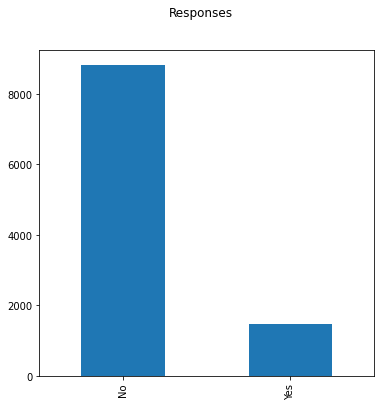

In [26]:
figresponse, ax = plt.subplots (figsize=(6,6))

data1["Response"].value_counts().plot(kind='bar')

plt.suptitle("Responses")

In [27]:
response_rate = data1.groupby(['Sales Channel','Response'])['Customer'].count().reset_index()


<AxesSubplot:title={'center':'Response Rate by Sales Channel'}, xlabel='Sales Channel', ylabel='Customer'>

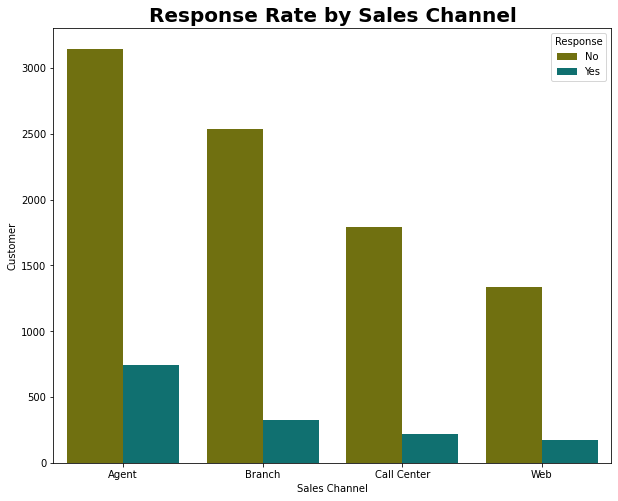

In [28]:
sns.color_palette("husl", 7) 
palette_used = {"Yes": "teal", "No": "olive"} 

fig_sales_channel, ax = plt.subplots(figsize = (10, 8)) 
ax.set_title('Response Rate by Sales Channel', size='20', fontweight='bold')

sns.barplot(x = response_rate['Sales Channel'], y = response_rate['Customer'], hue = response_rate['Response'], ax = ax, palette=palette_used)